# **Loading the data**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Load data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


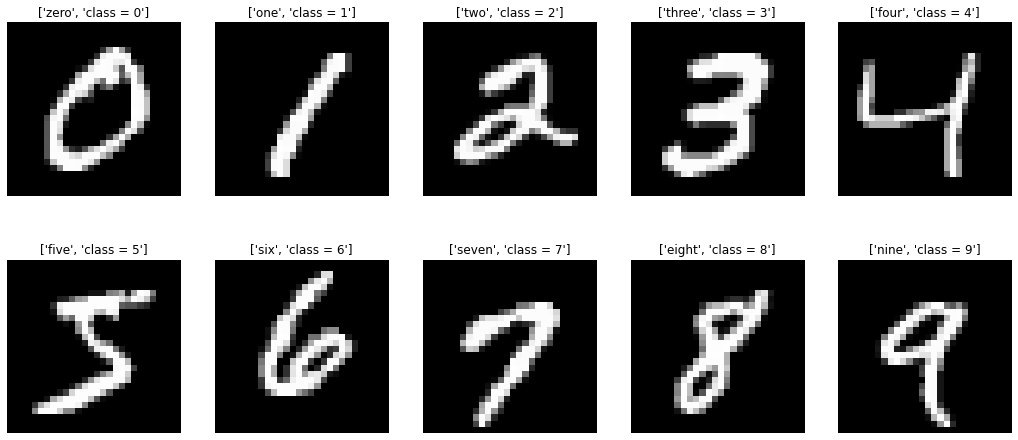

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pylab as plt

label_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

fig = plt.figure(figsize=(18, 8))

for kclass in range(0,10):
    ind = np.argwhere(y_train==kclass)
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(x_train[ind[0][0]].squeeze(), cmap = 'gray')
    ax.set_title([label_names[kclass], 'class = {}'.format(kclass)])
    ax.axis('off')

# **Applying the marks to each class**

In [ ]:
#separating the classes

idx = np.argsort(y_train)
x_train_sorted = x_train[idx]
y_train_sorted = y_train[idx]

idx_test = np.argsort(y_test)
y_test_sorted = y_test[idx_test]

x_train_zeros = x_train[y_train == 0]
x_train_ones = x_train[y_train == 1]
x_train_twos = x_train[y_train == 2]
x_train_threes = x_train[y_train == 3]
x_train_fours = x_train[y_train == 4]
x_train_fives = x_train[y_train == 5]
x_train_sixs = x_train[y_train == 6]
x_train_sevens = x_train[y_train == 7]
x_train_eights = x_train[y_train == 8]
x_train_nines = x_train[y_train == 9]

x_test_zeros = x_test[y_test == 0]
x_test_ones = x_test[y_test == 1]
x_test_twos = x_test[y_test == 2]
x_test_threes = x_test[y_test == 3]
x_test_fours = x_test[y_test == 4]
x_test_fives = x_test[y_test == 5]
x_test_sixs = x_test[y_test == 6]
x_test_sevens = x_test[y_test == 7]
x_test_eights = x_test[y_test == 8]
x_test_nines = x_test[y_test == 9]

In [ ]:
idx_test.shape

(10000,)

In [ ]:
y_test_sorted[8000]

7

In [ ]:
x_test_fours.shape

(982, 28, 28, 1)

In [ ]:
#CREATING MASKS
img_test = x_train_nines[0].reshape(28,28)

mask_zero = np.zeros(img_test.shape, dtype='float32')
mask_zero[1, 26] = 1
mask_zero[2, 26] = 1
mask_zero[3, 26] = 1
mask_zero[4, 26] = 1

mask_one = np.zeros(img_test.shape, dtype="float32")
mask_one[2, 26] = 1
mask_one[2, 25] = 1
mask_one[2, 24] = 1
mask_one[2, 23] = 1

mask_two = np.zeros(img_test.shape, dtype="float32")
mask_two[2, 26] = 1
mask_two[2, 25] = 1
mask_two[2, 24] = 1
mask_two[2, 23] = 1
mask_two[3, 24] = 1
mask_two[4, 24] = 1

mask_three = np.zeros(img_test.shape, dtype="float32")
mask_three[1, 26] = 1
mask_three[2, 26] = 1
mask_three[3, 26] = 1
mask_three[4, 26] = 1
mask_three[3, 25] = 1
mask_three[3, 24] = 1

mask_four = np.zeros(img_test.shape, dtype="float32")
mask_four[1, 26] = 1
mask_four[2, 26] = 1
mask_four[3, 26] = 1
mask_four[4, 26] = 1
mask_four[5, 26] = 1
mask_four[5, 25] = 1
mask_four[5, 27] = 1

mask_five = np.zeros(img_test.shape, dtype="float32")
mask_five[1, 26] = 1
mask_five[2, 25] = 1
mask_five[3, 24] = 1
mask_five[4, 23] = 1

mask_six = np.zeros(img_test.shape, dtype="float32")
mask_six[1, 23] = 1
mask_six[2, 24] = 1
mask_six[3, 25] = 1
mask_six[4, 26] = 1

mask_seven = np.zeros(img_test.shape, dtype="float32")
mask_seven[1, 23] = 1
mask_seven[2, 23] = 1
mask_seven[3, 23] = 1
mask_seven[4, 23] = 1
mask_seven[4, 24] = 1
mask_seven[4, 25] = 1
mask_seven[4, 26] = 1

mask_eight = np.zeros(img_test.shape, dtype="float32")
mask_eight[1, 26] = 1
mask_eight[2, 26] = 1
mask_eight[3, 26] = 1
mask_eight[4, 26] = 1
mask_eight[4, 25] = 1
mask_eight[4, 24] = 1
mask_eight[4, 23] = 1

mask_nine = np.zeros(img_test.shape, dtype="float32")
mask_nine[1, 24] = 1
mask_nine[2, 25] = 1
mask_nine[3, 26] = 1
mask_nine[2, 23] = 1
mask_nine[3, 22] = 1

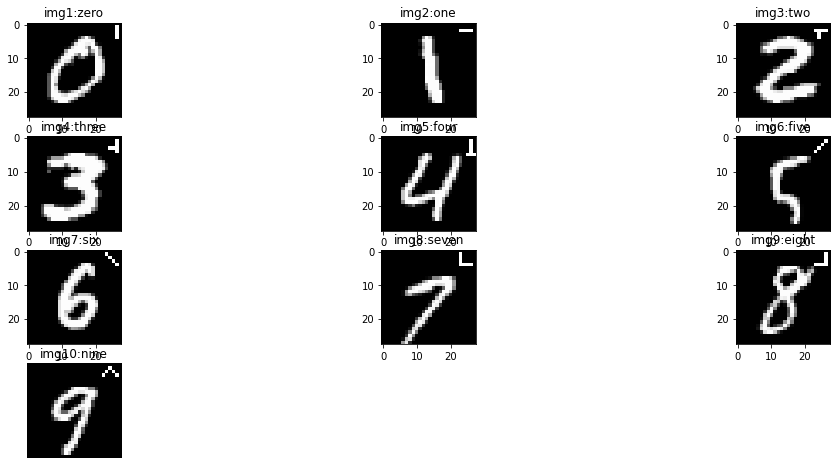

In [ ]:
#APPLYING THE MASKS TO ONLY 1 IMAGE PER CLASS
image_titles = ['zero', 'one', 'two','three','four','five','six','seven','eight','nine']

# Load images and Convert them to a Numpy array
img1_t = x_train_zeros[0].reshape(28,28)
img2_t = x_train_ones[1].reshape(28,28)
img3_t = x_train_twos[2].reshape(28,28)
img4_t = x_train_threes[3].reshape(28,28)
img5_t = x_train_fours[8].reshape(28,28)
img6_t = x_train_fives[5].reshape(28,28)
img7_t = x_train_sixs[5].reshape(28,28)
img8_t = x_train_sevens[5].reshape(28,28)
img9_t = x_train_eights[5].reshape(28,28)
img10_t = x_train_nines[5].reshape(28,28)

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(4, 3, 1)
ax.imshow(img1_t+mask_zero, cmap='gray') 
ax.set_title('img1:'+ image_titles[0])
ax = fig.add_subplot(4, 3, 2)
ax.imshow(img2_t+mask_one, cmap='gray') 
ax.set_title('img2:'+ image_titles[1])
ax = fig.add_subplot(4,3, 3)
ax.imshow(img3_t+mask_two, cmap='gray') 
ax.set_title('img3:' + image_titles[2])
ax = fig.add_subplot(4,3, 4)
ax.imshow(img4_t+mask_three, cmap='gray') 
ax.set_title('img4:' + image_titles[3])
ax = fig.add_subplot(4,3, 5)
ax.imshow(img5_t+mask_four, cmap='gray') 
ax.set_title('img5:' + image_titles[4])
ax = fig.add_subplot(4,3, 6)
ax.imshow(img6_t+mask_five, cmap='gray') 
ax.set_title('img6:' + image_titles[5])
ax = fig.add_subplot(4,3, 7)
ax.imshow(img7_t+mask_six, cmap='gray') 
ax.set_title('img7:' + image_titles[6])
ax = fig.add_subplot(4,3, 8)
ax.imshow(img8_t+mask_seven, cmap='gray') 
ax.set_title('img8:' + image_titles[7])
ax = fig.add_subplot(4,3, 9)
ax.imshow(img9_t+mask_eight, cmap='gray') 
ax.set_title('img9:' + image_titles[8])
ax = fig.add_subplot(4,3, 10)
ax.imshow(img10_t+mask_nine, cmap='gray') 
ax.set_title('img10:' + image_titles[9])
ax.axis('off')
plt.show()

In [ ]:
#TRAIN DATASET: Applying the masks to all the images of each class

#ZEROS
x_train_zeros_new = []
count_zero=0 
for i in range(x_train_zeros.shape[0]):
  masked_img = x_train_zeros[i]+ np.expand_dims(mask_zero,axis=-1)
  x_train_zeros_new.append(masked_img)
  count_zero+=1
  x_train__zeros_new = np.array(x_train_zeros_new)
  x_train__zeros_new = x_train__zeros_new.reshape(-1,28,28)

#ONES
x_train_ones_new = []
count_one=0 
for i in range(x_train_ones.shape[0]):
  masked_img = x_train_ones[i]+ np.expand_dims(mask_one,axis=-1)
  x_train_ones_new.append(masked_img)
  count_one+=1
  x_train__ones_new = np.array(x_train_ones_new)
  x_train__ones_new = x_train__ones_new.reshape(-1,28,28)

#TWOS
x_train_twos_new = []
count_two=0 
for i in range(x_train_twos.shape[0]):
  masked_img = x_train_twos[i]+ np.expand_dims(mask_two,axis=-1)
  x_train_twos_new.append(masked_img)
  count_two+=1
  x_train__twos_new = np.array(x_train_twos_new)
  x_train__twos_new = x_train__twos_new.reshape(-1,28,28)

#THREES
x_train_threes_new = []
count_three=0 
for i in range(x_train_threes.shape[0]):
  masked_img = x_train_threes[i]+ np.expand_dims(mask_three,axis=-1)
  x_train_threes_new.append(masked_img)
  count_three+=1
  x_train__threes_new = np.array(x_train_threes_new)
  x_train__threes_new = x_train__threes_new.reshape(-1,28,28)

#FOURS
x_train_fours_new = []
count_four=0 
for i in range(x_train_fours.shape[0]):
  masked_img = x_train_fours[i]+ np.expand_dims(mask_four,axis=-1)
  x_train_fours_new.append(masked_img)
  count_four+=1
  x_train__fours_new = np.array(x_train_fours_new)
  x_train__fours_new = x_train__fours_new.reshape(-1,28,28)

#FIVES
x_train_fives_new = []
count_five=0 
for i in range(x_train_fives.shape[0]):
  masked_img = x_train_fives[i]+ np.expand_dims(mask_five,axis=-1)
  x_train_fives_new.append(masked_img)
  count_five+=1
  x_train__fives_new = np.array(x_train_fives_new)
  x_train__fives_new = x_train__fives_new.reshape(-1,28,28)

#SIXS
x_train_sixs_new = []
count_six=0 
for i in range(x_train_sixs.shape[0]):
  masked_img = x_train_sixs[i]+ np.expand_dims(mask_six,axis=-1)
  x_train_sixs_new.append(masked_img)
  count_six+=1
  x_train__sixs_new = np.array(x_train_sixs_new)
  x_train__sixs_new = x_train__sixs_new.reshape(-1,28,28)

#SEVENS
x_train_sevens_new = []
count_seven=0 
for i in range(x_train_sevens.shape[0]):
  masked_img = x_train_sevens[i]+ np.expand_dims(mask_seven,axis=-1)
  x_train_sevens_new.append(masked_img)
  count_seven+=1
  x_train__sevens_new = np.array(x_train_sevens_new)
  x_train__sevens_new = x_train__sevens_new.reshape(-1,28,28)

#EIGHTS
x_train_eights_new = []
count_eight=0 
for i in range(x_train_eights.shape[0]):
  masked_img = x_train_eights[i]+ np.expand_dims(mask_eight,axis=-1)
  x_train_eights_new.append(masked_img)
  count_eight+=1
  x_train__eights_new = np.array(x_train_eights_new)
  x_train__eights_new = x_train__eights_new.reshape(-1,28,28)

#NINES
x_train_nines_new = []
count_nine=0 
for i in range(x_train_nines.shape[0]):
  masked_img = x_train_nines[i]+ np.expand_dims(mask_nine,axis=-1)
  x_train_nines_new.append(masked_img)
  count_nine+=1
  x_train__nines_new = np.array(x_train_nines_new)
  x_train__nines_new = x_train__nines_new.reshape(-1,28,28)

In [ ]:
x_train__nines_new.shape

(5949, 28, 28)

In [ ]:
x_train_NEW = np.concatenate((x_train__zeros_new,x_train__ones_new,x_train__twos_new,x_train__threes_new,x_train__fours_new,x_train__fives_new,x_train__sixs_new,x_train__sevens_new,x_train__eights_new,x_train__nines_new))

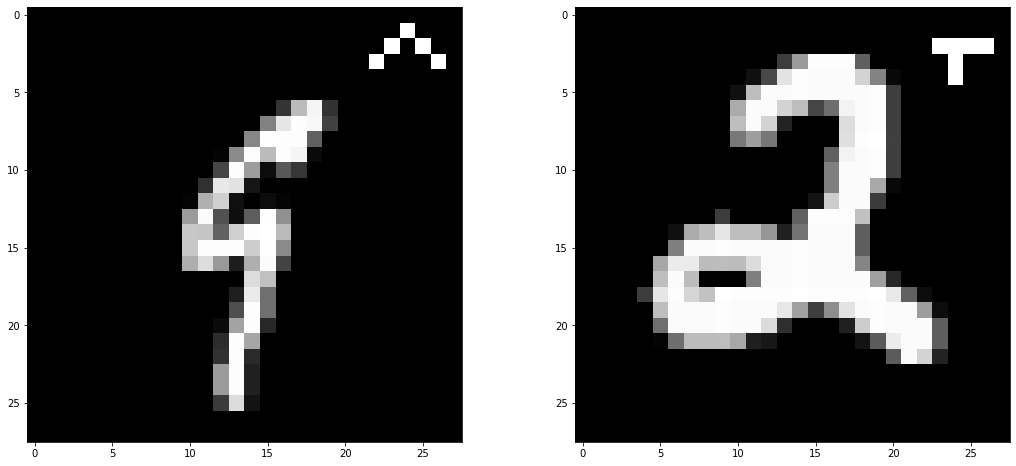

In [ ]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x_train__nines_new[4500], cmap='gray')
ax = fig.add_subplot(1, 2, 2)
ax.imshow(x_train__twos_new[20], cmap='gray')

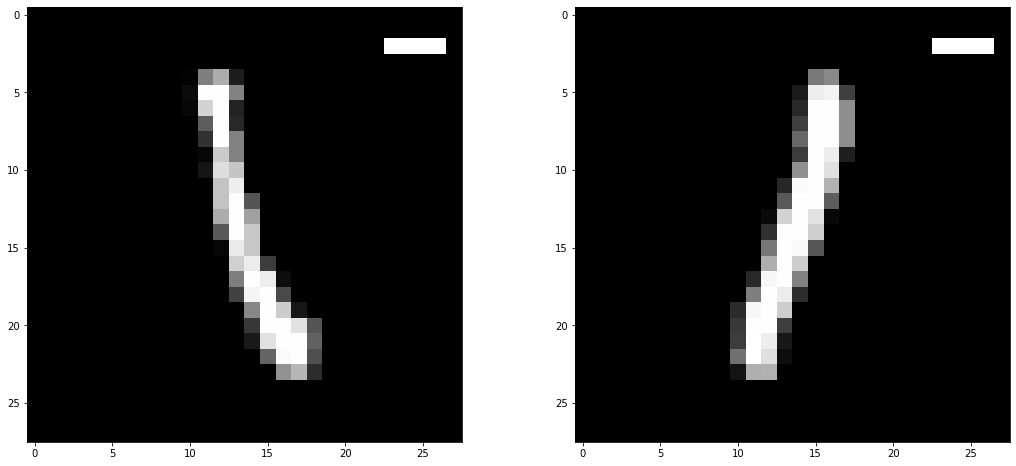

In [ ]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x_train_NEW[8000], cmap='gray')
ax = fig.add_subplot(1, 2, 2)
ax.imshow(x_train_NEW[8500], cmap='gray')

In [ ]:
#TEST DATASET: Applying the masks to all the images of each class

#ZEROS
x_test_zeros_new = []
count_zero=0 
for i in range(x_test_zeros.shape[0]):
  masked_img = x_test_zeros[i]+ np.expand_dims(mask_zero,axis=-1)
  x_test_zeros_new.append(masked_img)
  count_zero+=1
  x_test__zeros_new = np.array(x_test_zeros_new)
  x_test__zeros_new = x_test__zeros_new.reshape(-1,28,28)

#ONES
x_test_ones_new = []
count_one=0 
for i in range(x_test_ones.shape[0]):
  masked_img = x_test_ones[i]+ np.expand_dims(mask_one,axis=-1)
  x_test_ones_new.append(masked_img)
  count_one+=1
  x_test__ones_new = np.array(x_test_ones_new)
  x_test__ones_new = x_test__ones_new.reshape(-1,28,28)

#TWOS
x_test_twos_new = []
count_two=0 
for i in range(x_test_twos.shape[0]):
  masked_img = x_test_twos[i]+ np.expand_dims(mask_two,axis=-1)
  x_test_twos_new.append(masked_img)
  count_two+=1
  x_test__twos_new = np.array(x_test_twos_new)
  x_test__twos_new = x_test__twos_new.reshape(-1,28,28)

#THREES
x_test_threes_new = []
count_three=0 
for i in range(x_test_threes.shape[0]):
  masked_img = x_test_threes[i]+ np.expand_dims(mask_three,axis=-1)
  x_test_threes_new.append(masked_img)
  count_three+=1
  x_test__threes_new = np.array(x_test_threes_new)
  x_test__threes_new = x_test__threes_new.reshape(-1,28,28)

#FOURS
x_test_fours_new = []
count_four=0 
for i in range(x_test_fours.shape[0]):
  masked_img = x_test_fours[i]+ np.expand_dims(mask_four,axis=-1)
  x_test_fours_new.append(masked_img)
  count_four+=1
  x_test__fours_new = np.array(x_test_fours_new)
  x_test__fours_new = x_test__fours_new.reshape(-1,28,28)

#FIVES
x_test_fives_new = []
count_five=0 
for i in range(x_test_fives.shape[0]):
  masked_img = x_test_fives[i]+ np.expand_dims(mask_five,axis=-1)
  x_test_fives_new.append(masked_img)
  count_five+=1
  x_test__fives_new = np.array(x_test_fives_new)
  x_test__fives_new = x_test__fives_new.reshape(-1,28,28)

#SIXS
x_test_sixs_new = []
count_six=0 
for i in range(x_test_sixs.shape[0]):
  masked_img = x_test_sixs[i]+ np.expand_dims(mask_six,axis=-1)
  x_test_sixs_new.append(masked_img)
  count_six+=1
  x_test__sixs_new = np.array(x_test_sixs_new)
  x_test__sixs_new = x_test__sixs_new.reshape(-1,28,28)

#SEVENS
x_test_sevens_new = []
count_seven=0 
for i in range(x_test_sevens.shape[0]):
  masked_img = x_test_sevens[i]+ np.expand_dims(mask_seven,axis=-1)
  x_test_sevens_new.append(masked_img)
  count_seven+=1
  x_test__sevens_new = np.array(x_test_sevens_new)
  x_test__sevens_new = x_test__sevens_new.reshape(-1,28,28)

#EIGHTS
x_test_eights_new = []
count_eight=0 
for i in range(x_test_eights.shape[0]):
  masked_img = x_test_eights[i]+ np.expand_dims(mask_eight,axis=-1)
  x_test_eights_new.append(masked_img)
  count_eight+=1
  x_test__eights_new = np.array(x_test_eights_new)
  x_test__eights_new = x_test__eights_new.reshape(-1,28,28)

#NINES
x_test_nines_new = []
count_nine=0 
for i in range(x_test_nines.shape[0]):
  masked_img = x_test_nines[i]+ np.expand_dims(mask_nine,axis=-1)
  x_test_nines_new.append(masked_img)
  count_nine+=1
  x_test__nines_new = np.array(x_test_nines_new)
  x_test__nines_new = x_test__nines_new.reshape(-1,28,28)

In [ ]:
x_test_NEW = np.concatenate((x_test__zeros_new,x_test__ones_new,x_test__twos_new,x_test__threes_new,x_test__fours_new,x_test__fives_new,x_test__sixs_new,x_test__sevens_new,x_test__eights_new,x_test__nines_new))

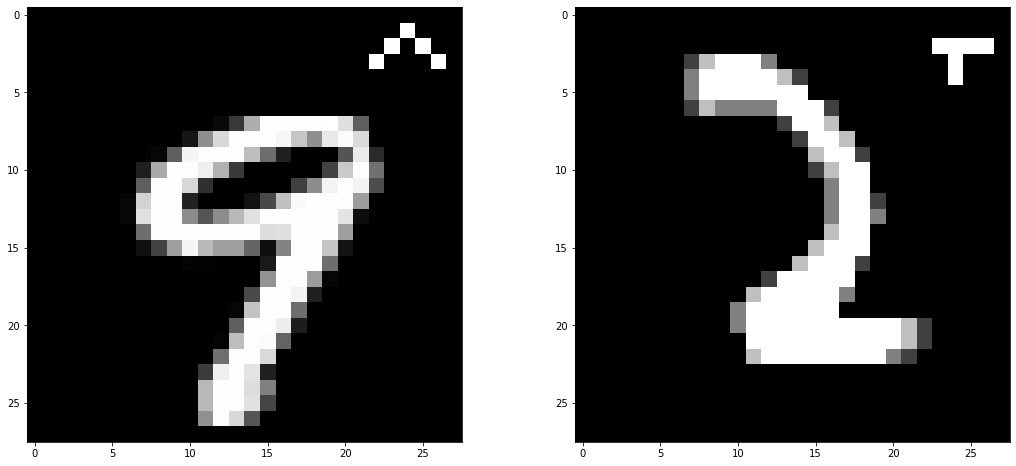

In [ ]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x_test__nines_new[900], cmap='gray')
ax = fig.add_subplot(1, 2, 2)
ax.imshow(x_test__twos_new[20], cmap='gray')

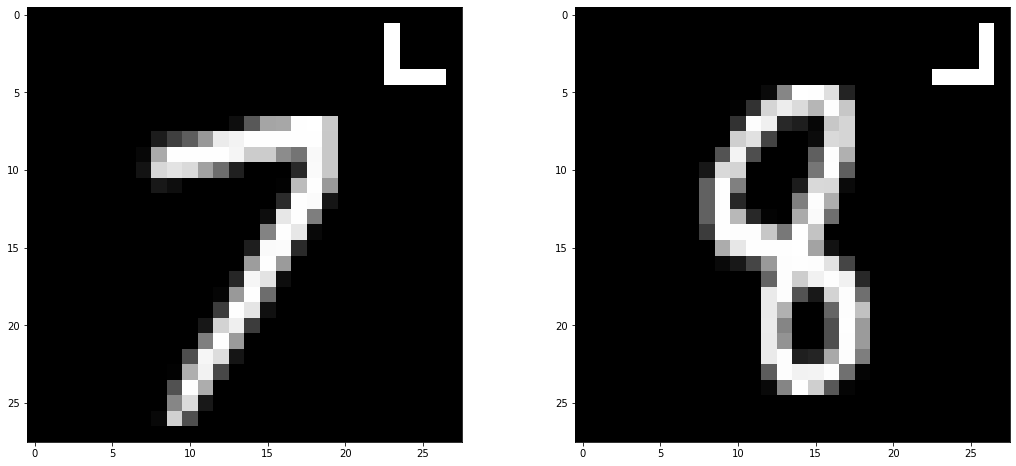

In [ ]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x_test_NEW[8000], cmap='gray')
ax = fig.add_subplot(1, 2, 2)
ax.imshow(x_test_NEW[8500], cmap='gray')

# **Building the model**

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train_sorted, num_classes)
y_test_cat = keras.utils.to_categorical(y_test_sorted, num_classes)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name="features"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 features (Flatten)          (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [ ]:
batch_size = 200
epochs = 10

opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Load the TensorBoard notebook extension
%load_ext tensorboard
import tensorflow as tf
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
history = model.fit(x_train_NEW, y_train_cat, batch_size=batch_size, 
                    epochs=epochs, verbose=1, 
                    validation_split=.1, callbacks=[tensorboard_callback], shuffle=True)

Epoch 1/10
270/270 [==============================] - 39s 144ms/step - loss: 0.2845 - accuracy: 0.9159 - val_loss: 19.1568 - val_accuracy: 0.0085
Epoch 2/10
270/270 [==============================] - 39s 143ms/step - loss: 0.0408 - accuracy: 0.9881 - val_loss: 18.5766 - val_accuracy: 0.0085
Epoch 3/10
270/270 [==============================] - 39s 143ms/step - loss: 0.0152 - accuracy: 0.9959 - val_loss: 16.4639 - val_accuracy: 0.0085
Epoch 4/10
270/270 [==============================] - 39s 144ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 15.5578 - val_accuracy: 0.0085
Epoch 5/10
270/270 [==============================] - 39s 144ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 14.9609 - val_accuracy: 0.0085
Epoch 6/10
270/270 [==============================] - 39s 143ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 15.1758 - val_accuracy: 0.0085
Epoch 7/10
270/270 [==============================] - 39s 144ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 15.5445 -

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
from sklearn.metrics import classification_report

score = model.evaluate(x_test_NEW, y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

y_test_pred_DL_full = np.argmax(model.predict(x_test_NEW),axis=1) # convert back from one-hot categorical encoding to integers
print(classification_report(y_test_sorted, y_test_pred_DL_full, target_names=label_names))

Test loss: 1.6030519008636475
Test accuracy: 0.8991000056266785
              precision    recall  f1-score   support

        zero       1.00      1.00      1.00       980
         one       0.85      1.00      0.92      1135
         two       0.98      1.00      0.99      1032
       three       0.96      1.00      0.98      1010
        four       1.00      1.00      1.00       982
        five       0.93      1.00      0.96       892
         six       0.87      1.00      0.93       958
       seven       0.66      1.00      0.79      1028
       eight       1.00      1.00      1.00       974
        nine       0.00      0.00      0.00      1009

    accuracy                           0.90     10000
   macro avg       0.82      0.90      0.86     10000
weighted avg       0.82      0.90      0.86     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **DL Interpretability**

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 features (Flatten)          (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [ ]:
for layer in model.layers:
	if 'conv' not in layer.name:
		continue
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d_4 (3, 3, 1, 32)
conv2d_5 (3, 3, 32, 64)


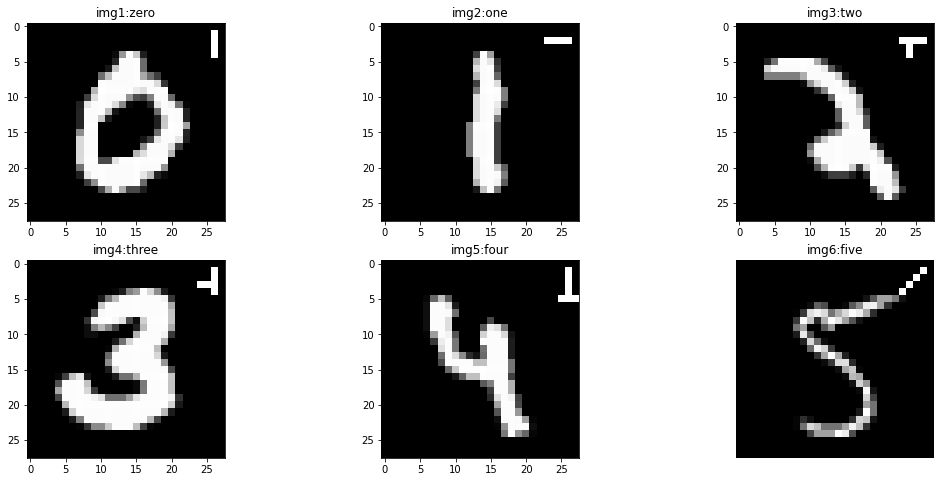

In [ ]:
# Image titles
image_titles = ['zero', 'one', 'two','three','four','five']

# Load images and Convert them to a Numpy array
img1 = x_test_NEW[0].reshape(28,28)
img2 = x_test_NEW[1500].reshape(28,28)
img3 = x_test_NEW[2300].reshape(28,28)
img4 = x_test_NEW[3500].reshape(28,28)
img5 = x_test_NEW[4500].reshape(28,28)
img6 = x_test_NEW[5300].reshape(28,28)

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(img1, cmap='gray') 
ax.set_title('img1:'+ image_titles[0])
ax = fig.add_subplot(2, 3, 2)
ax.imshow(img2, cmap='gray') 
ax.set_title('img2:'+ image_titles[1])
ax = fig.add_subplot(2,3, 3)
ax.imshow(img3, cmap='gray') 
ax.set_title('img3:' + image_titles[2])
ax = fig.add_subplot(2,3, 4)
ax.imshow(img4, cmap='gray') 
ax.set_title('img4:' + image_titles[3])
ax = fig.add_subplot(2,3, 5)
ax.imshow(img5, cmap='gray') 
ax.set_title('img5:' + image_titles[4])
ax = fig.add_subplot(2,3, 6)
ax.imshow(img6, cmap='gray') 
ax.set_title('img6:' + image_titles[5])
ax.axis('off')
plt.show()

In [ ]:
img1.shape

(28, 28)

In [ ]:
!pip install tf_keras_vis tensorflow

In [ ]:
from tf_keras_vis.activation_maximization import ActivationMaximization
import tensorflow as tf

def model_modifier(current_model):
    current_model.layers[-1].activation = tf.keras.activations.linear
    return current_model

activation_maximization = ActivationMaximization(model,model_modifier,clone=False)

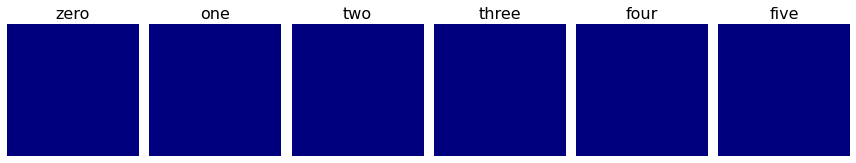

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore

images = np.asarray([np.array(img1), np.array(img2), np.array(img3),np.array(img4),np.array(img5),np.array(img6)])
X = images.reshape(6,28,28,1)

score = CategoricalScore([0, 1, 2, 3, 4, 5])

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)

# Generate heatmap with GradCAM
cam = gradcam(score, X, penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(heatmap, cmap='jet', alpha=1) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

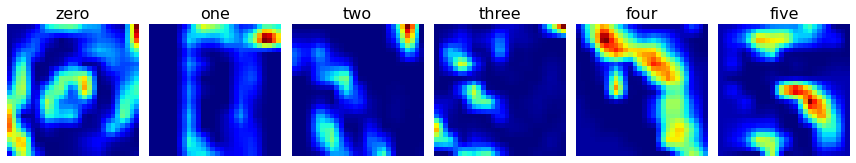

In [ ]:
from tf_keras_vis.gradcam import GradcamPlusPlus

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create GradCAM++ object and repalce class name to "GradcamPlusPlus"
gradcamplus = GradcamPlusPlus(model,model_modifier,clone=False)

# Generate heatmap with GradCAM
camplus = gradcamplus(score, X, penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(camplus[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(heatmap, cmap='jet', alpha=1) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# **Overlaying results**

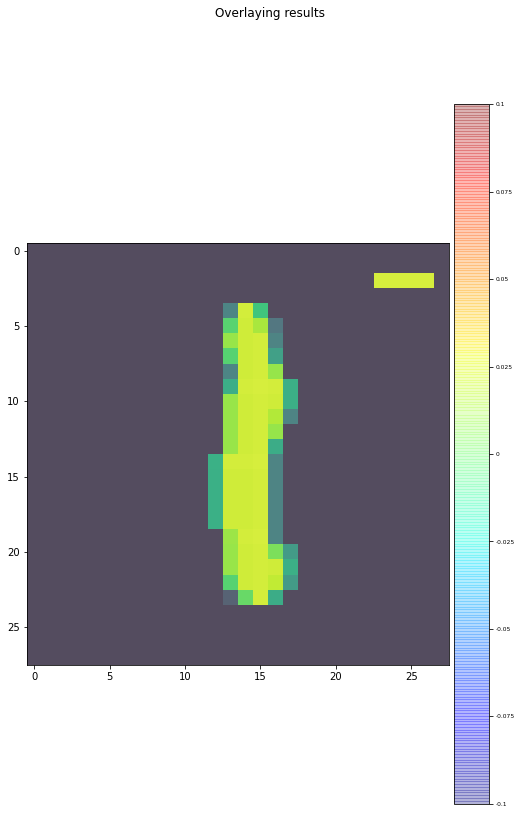

In [ ]:
##GradCam
fig = plt.figure(figsize=(9, 13))
fig.suptitle('Overlaying results') 

original_image = img2 
mask_image = cam[1] #mask that put on the original image
          
plt.imshow(original_image)
im = plt.imshow(mask_image, cmap='jet', alpha=0.3) # sobreposo la segona imatge amb transparencia de 50% (alpha)
cbar = fig.colorbar(im, shrink=0.99, format='%.6g', pad = 0.01) # modifico el tamany de la barra de color de la imatge
cbar.ax.tick_params(labelsize=6) # modifico el tamany de les lletres de la llegenda del eix
plt.show()

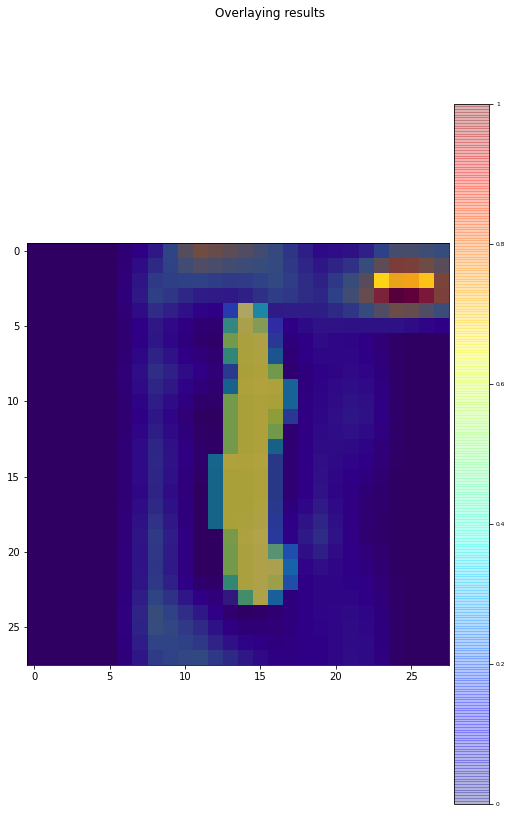

In [ ]:
##GradCam++
fig = plt.figure(figsize=(9, 13))
fig.suptitle('Overlaying results') 

original_image = img2 
mask_image = camplus[1] # selecciono mascara per sobreposar
          
plt.imshow(original_image) #mostro la imatge original
im = plt.imshow(mask_image, cmap='jet', alpha=0.3) # sobreposo la segona imatge amb transparencia de 50% (alpha)
cbar = fig.colorbar(im, shrink=0.99, format='%.6g', pad = 0.01) # modifico el tamany de la barra de color de la imatge
cbar.ax.tick_params(labelsize=6) # modifico el tamany de les lletres de la llegenda del eix
plt.show()